<a href="https://colab.research.google.com/github/noyon57/DiabetiesNewDATaset/blob/main/DiabetesNEwFullWork(!).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import os
import xgboost
from sklearn.ensemble import AdaBoostClassifier
import shap
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score , recall_score, precision_score, f1_score


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

Dataset import


In [7]:
df = pd.read_csv("/content/Dataset of Diabetes .csv") 

In [8]:


df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [9]:
df['CLASS'].value_counts()


Y     844
N     102
P      53
N       1
Name: CLASS, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [11]:
df['CLASS'] = df['CLASS'].str.replace("N ","N")

In [12]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [13]:
df['CLASS'].unique()

array(['N', 'P', 'Y'], dtype=object)

# **Label Encoder**

In [14]:
df.CLASS= le.fit_transform(df.CLASS.values)
df.Gender= le.fit_transform(df.Gender.values)

In [15]:
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,735,34221,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,420,47975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,680,87656,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,504,34223,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0


In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   int64  
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   int64  
dtypes: float64(8), int64(6)
memory usage: 109.5 KB


In [17]:
df.describe()


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,0.565000,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020,1.741000
std,240.397673,3.380758e+06,0.496005,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388,0.631124
min,1.000000,1.230000e+02,0.000000,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000,0.000000
25%,125.750000,2.406375e+04,0.000000,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000,2.000000
50%,300.500000,3.439550e+04,1.000000,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000,2.000000
75%,550.250000,4.538425e+04,1.000000,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000,2.000000
max,800.000000,7.543566e+07,1.000000,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000,2.000000


Visualizing aspects of the **dataset**

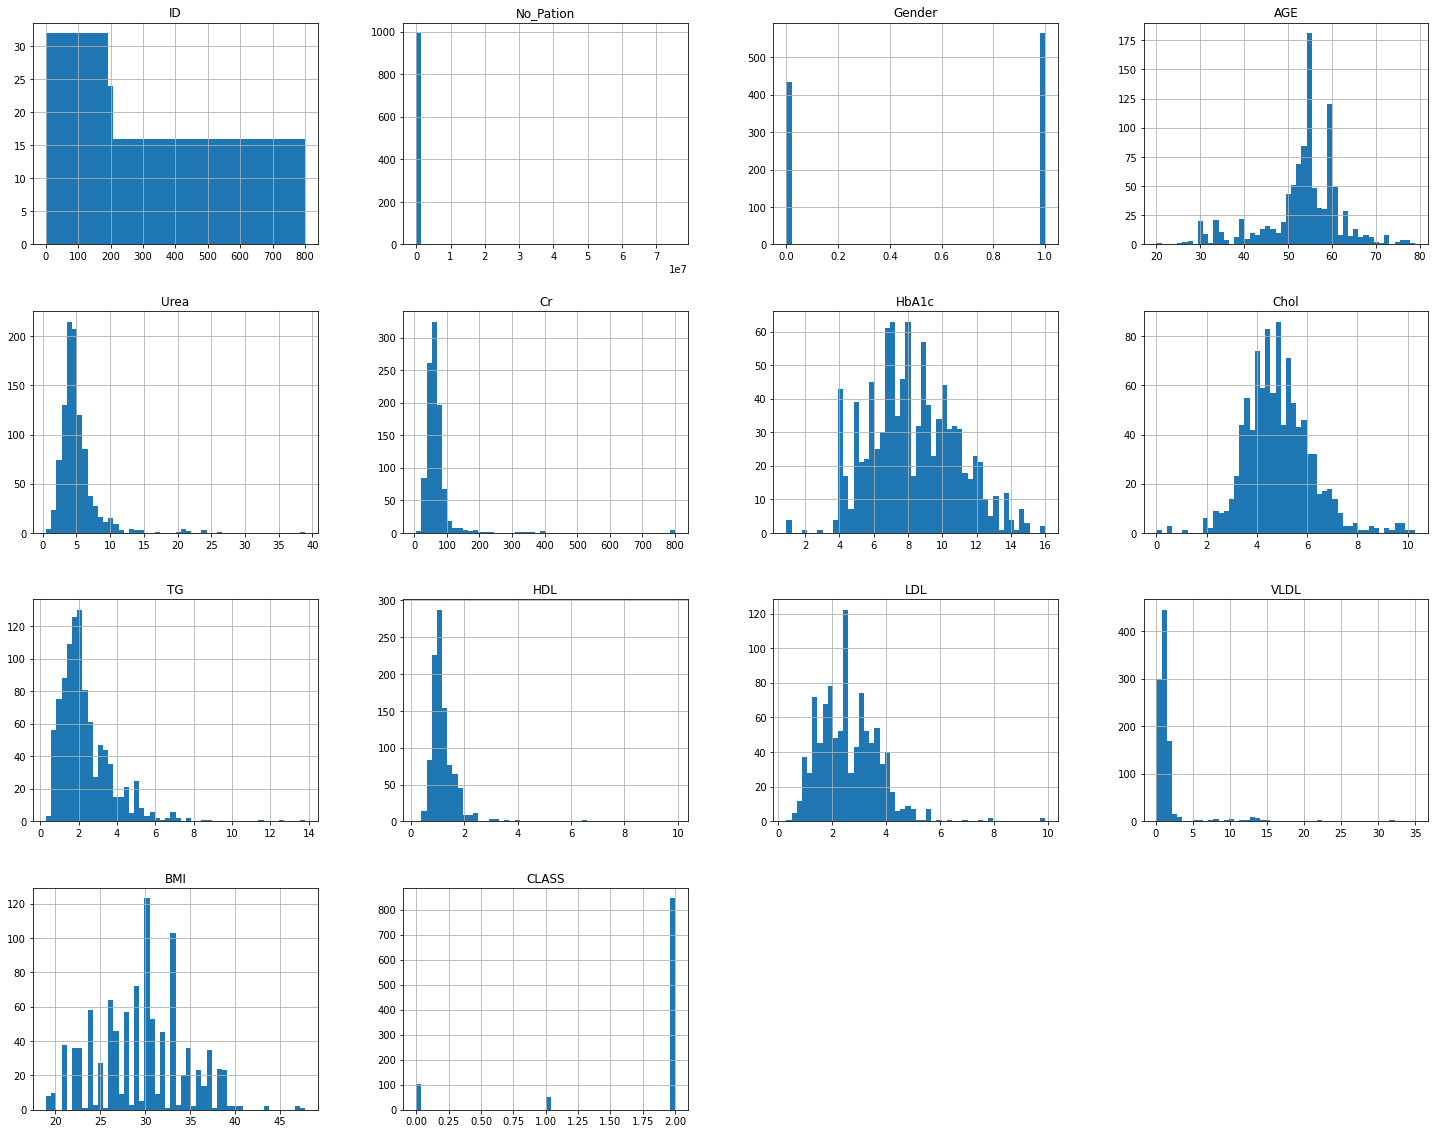

In [18]:
df.hist(bins=50, figsize=(25, 20))
plt.show()

Removing duplicated data points



```

**bold text**

In [19]:
df.drop_duplicates(keep='first', inplace=True)

**Creating a test set**

In [20]:
original_train_df, test_df = train_test_split(df, test_size=0.2)

# To be sure we will create a copy for further processing
train_df = original_train_df.copy() 

Gaining further insight
**bold text**

In [21]:
correlation_matrix = train_df.corr(method='pearson')

correlation_matrix 

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
ID,1.000000,0.076759,0.022451,-0.064065,-0.091920,-0.076816,-0.001465,0.013867,-0.060994,0.032815,-0.080653,0.165502,0.067032,-0.051541
No_Pation,0.076759,1.000000,0.054737,-0.101568,-0.021012,0.002200,-0.037116,-0.034987,-0.044820,-0.014310,-0.002336,0.115691,0.020008,-0.052974
Gender,0.022451,0.054737,1.000000,-0.015655,0.094880,0.152013,0.018830,-0.052791,0.084796,-0.142230,0.055045,0.201289,0.082597,0.132173
AGE,-0.064065,-0.101568,-0.015655,1.000000,0.097180,0.058973,0.389298,0.062560,0.156494,-0.026378,0.020658,-0.096937,0.364851,0.447478
Urea,-0.091920,-0.021012,0.094880,0.097180,1.000000,0.614010,-0.023483,0.026253,0.060708,-0.023981,0.021435,-0.004038,0.035299,0.063268
Cr,-0.076816,0.002200,0.152013,0.058973,0.614010,1.000000,-0.049439,0.036405,0.103592,-0.019408,0.088725,0.015383,0.046625,0.038493
HbA1c,-0.001465,-0.037116,0.018830,0.389298,-0.023483,-0.049439,1.000000,0.206797,0.228040,0.021326,0.029889,0.074429,0.420267,0.563991
Chol,0.013867,-0.034987,-0.052791,0.062560,0.026253,0.036405,0.206797,1.000000,0.324192,0.133044,0.448357,0.071857,0.052177,0.193739
TG,-0.060994,-0.044820,0.084796,0.156494,0.060708,0.103592,0.228040,0.324192,1.000000,-0.078378,0.023743,0.152414,0.128891,0.187841
HDL,0.032815,-0.014310,-0.142230,-0.026378,-0.023981,-0.019408,0.021326,0.133044,-0.078378,1.000000,-0.145945,-0.064265,0.069993,0.000238


In [22]:
correlation_matrix["CLASS"].sort_values()


No_Pation   -0.052974
ID          -0.051541
HDL          0.000238
LDL          0.016176
Cr           0.038493
Urea         0.063268
VLDL         0.099647
Gender       0.132173
TG           0.187841
Chol         0.193739
AGE          0.447478
HbA1c        0.563991
BMI          0.569172
CLASS        1.000000
Name: CLASS, dtype: float64

Handling missing data

In [23]:
names = ['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']

for name in names:
    train_df[name].replace(0, np.nan, inplace=True)

In [24]:
train_df.head()


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
52,620,34260,1.0,43,2.4,40,5.0,4.8,1.9,1.1,3.0,0.8,21.0,0
394,419,24111,1.0,55,5.7,76,6.8,5.5,1.5,0.7,4.1,0.7,29.0,2
624,451,34466,1.0,59,6.8,62,8.9,4.5,1.2,0.9,3.1,0.5,33.0,2
142,342,41281,1.0,50,3.5,59,6.0,4.0,2.1,1.4,1.9,0.9,25.0,1
308,287,24067,NaN,59,4.7,55,7.0,3.4,1.8,1.1,1.8,0.8,26.0,2


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   int64  
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   int64  
dtypes: float64(8), int64(6)
memory usage: 117.2 KB


In [26]:
id_median = train_df["ID"].median()
no_pation_median = train_df["No_Pation"].median()
gender_median = train_df["Gender"].median()
age_median = train_df["AGE"].median()
urea_median = train_df["Urea"].median()
cr_median = train_df["Cr"].median()
hba1c_median = train_df['HbA1c'].median()
chol_median = train_df['Chol'].median()
tg_median = train_df['TG'].median()
hdl_median = train_df['HDL'].median()
ldl_median = train_df['LDL'].median()
vldl_median = train_df['VLDL'].median()
bmi_median = train_df['BMI'].median()

train_df["ID"].fillna(id_median, inplace=True)
train_df["No_Pation"].fillna(no_pation_median, inplace=True)
train_df["Gender"].fillna(gender_median, inplace=True)
train_df["AGE"].fillna(age_median, inplace=True)
train_df["Urea"].fillna(urea_median, inplace=True)
train_df["Cr"].fillna(cr_median, inplace=True)
train_df["HbA1c"].fillna(hba1c_median, inplace=True)
train_df["Chol"].fillna(chol_median, inplace=True)
train_df["TG"].fillna(tg_median, inplace=True)
train_df["HDL"].fillna(hdl_median, inplace=True)
train_df["LDL"].fillna(ldl_median, inplace=True)
train_df["VLDL"].fillna(vldl_median, inplace=True)
train_df["BMI"].fillna(bmi_median, inplace=True)

In [27]:
train_df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
52,620,34260,1.0,43,2.4,40,5.0,4.8,1.9,1.1,3.0,0.8,21.0,0
394,419,24111,1.0,55,5.7,76,6.8,5.5,1.5,0.7,4.1,0.7,29.0,2
624,451,34466,1.0,59,6.8,62,8.9,4.5,1.2,0.9,3.1,0.5,33.0,2
142,342,41281,1.0,50,3.5,59,6.0,4.0,2.1,1.4,1.9,0.9,25.0,1
308,287,24067,1.0,59,4.7,55,7.0,3.4,1.8,1.1,1.8,0.8,26.0,2


**Encoding categorial attributes**

In [28]:
# Copy original dataframe and add new column with random fitness values
temp_df = train_df.copy()
fitness_values = ["bad", "moderate", "good", "very good",]
temp_df['fitness'] = np.random.choice(fitness_values, temp_df.shape[0])

temp_df.head(5)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,fitness
52,620,34260,1.0,43,2.4,40,5.0,4.8,1.9,1.1,3.0,0.8,21.0,0,moderate
394,419,24111,1.0,55,5.7,76,6.8,5.5,1.5,0.7,4.1,0.7,29.0,2,bad
624,451,34466,1.0,59,6.8,62,8.9,4.5,1.2,0.9,3.1,0.5,33.0,2,bad
142,342,41281,1.0,50,3.5,59,6.0,4.0,2.1,1.4,1.9,0.9,25.0,1,good
308,287,24067,1.0,59,4.7,55,7.0,3.4,1.8,1.1,1.8,0.8,26.0,2,good


In [29]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
fitness_encoded = encoder.fit_transform(temp_df["fitness"])

for id_, class_ in enumerate(encoder.classes_):
    print(f"class id {id_} has label {class_}")

print()
print(f"Encoded fitness values for first 10 entries: {fitness_encoded[:10]}")

class id 0 has label bad
class id 1 has label good
class id 2 has label moderate
class id 3 has label very good

Encoded fitness values for first 10 entries: [2 0 0 1 1 1 2 2 2 1]


**Rescaling or standardizing attributes**

In [30]:
from sklearn.preprocessing import MinMaxScaler

# initialize min-max scaler
mm_scaler = MinMaxScaler()

temp1_df = train_df.copy()
column_names = temp1_df.columns.tolist()

# transform all attributes
temp1_df[column_names] = mm_scaler.fit_transform(temp1_df[column_names])

temp1_df.sort_index(inplace=True)
temp1_df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0.627034,0.000235,0.0,0.462963,0.095238,0.050378,0.264901,0.377551,0.044444,0.226804,0.144737,0.011461,0.173913,0.0
1,0.918648,0.000451,0.0,0.018519,0.089947,0.070529,0.264901,0.326531,0.081481,0.092784,0.236842,0.014327,0.139130,0.0
2,0.524406,0.000633,0.0,0.462963,0.095238,0.050378,0.264901,0.377551,0.044444,0.226804,0.144737,0.011461,0.173913,0.0
3,0.849812,0.001159,0.0,0.462963,0.095238,0.050378,0.264901,0.377551,0.044444,0.226804,0.144737,0.011461,0.173913,0.0
5,0.792240,0.000451,0.0,0.370370,0.031746,0.022670,0.205298,0.244898,0.051852,0.082474,0.157895,0.008596,0.069565,0.0


In [31]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

temp2_df = train_df.copy()

# transform all attributes
temp2_df[column_names] = mm_scaler.fit_transform(temp2_df[column_names])
temp2_df.sort_index(inplace=True)
temp2_df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0.627034,0.000235,0.0,0.462963,0.095238,0.050378,0.264901,0.377551,0.044444,0.226804,0.144737,0.011461,0.173913,0.0
1,0.918648,0.000451,0.0,0.018519,0.089947,0.070529,0.264901,0.326531,0.081481,0.092784,0.236842,0.014327,0.139130,0.0
2,0.524406,0.000633,0.0,0.462963,0.095238,0.050378,0.264901,0.377551,0.044444,0.226804,0.144737,0.011461,0.173913,0.0
3,0.849812,0.001159,0.0,0.462963,0.095238,0.050378,0.264901,0.377551,0.044444,0.226804,0.144737,0.011461,0.173913,0.0
5,0.792240,0.000451,0.0,0.370370,0.031746,0.022670,0.205298,0.244898,0.051852,0.082474,0.157895,0.008596,0.069565,0.0


In [32]:
df['CLASS'].value_counts()

2    844
0    103
1     53
Name: CLASS, dtype: int64

In [33]:
df.groupby('CLASS').mean()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
CLASS,,,,,,,,,,,,,
0,368.252427,815851.990291,0.378641,44.233010,4.680583,62.796117,4.560194,4.268932,1.625243,1.227184,2.625243,0.943689,22.374757
1,396.056604,64299.037736,0.679245,43.283019,4.511321,66.075472,6.003774,4.579245,2.126415,1.127358,2.493396,0.983019,23.933962
2,333.624408,216955.928910,0.580569,55.305687,5.217468,69.873223,8.878270,4.953104,2.452026,1.206872,2.615213,2.020616,30.811517


In [34]:
X = df.drop( 'CLASS', axis=1)


In [35]:
print(X)

      ID  No_Pation  Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0    502      17975       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1    735      34221       1   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2    420      47975       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3    680      87656       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4    504      34223       1   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   
..   ...        ...     ...  ...   ...  ..    ...   ...  ...  ...  ...   ...   
995  200     454317       1   71  11.0  97    7.0   7.5  1.7  1.2  1.8   0.6   
996  671     876534       1   31   3.0  60   12.3   4.1  2.2  0.7  2.4  15.4   
997  669      87654       1   30   7.1  81    6.7   4.1  1.1  1.2  2.4   8.1   
998   99      24004       1   38   5.8  59    6.7   5.3  2.0  1.6  2.9  14.0   
999  248      24054       1   54   5.0  67    6.9   3.8  1.7  1.1  3.0   0.7   

      BMI  
0    24.0  
1    23.0  
2  

In [36]:
y = df['CLASS']

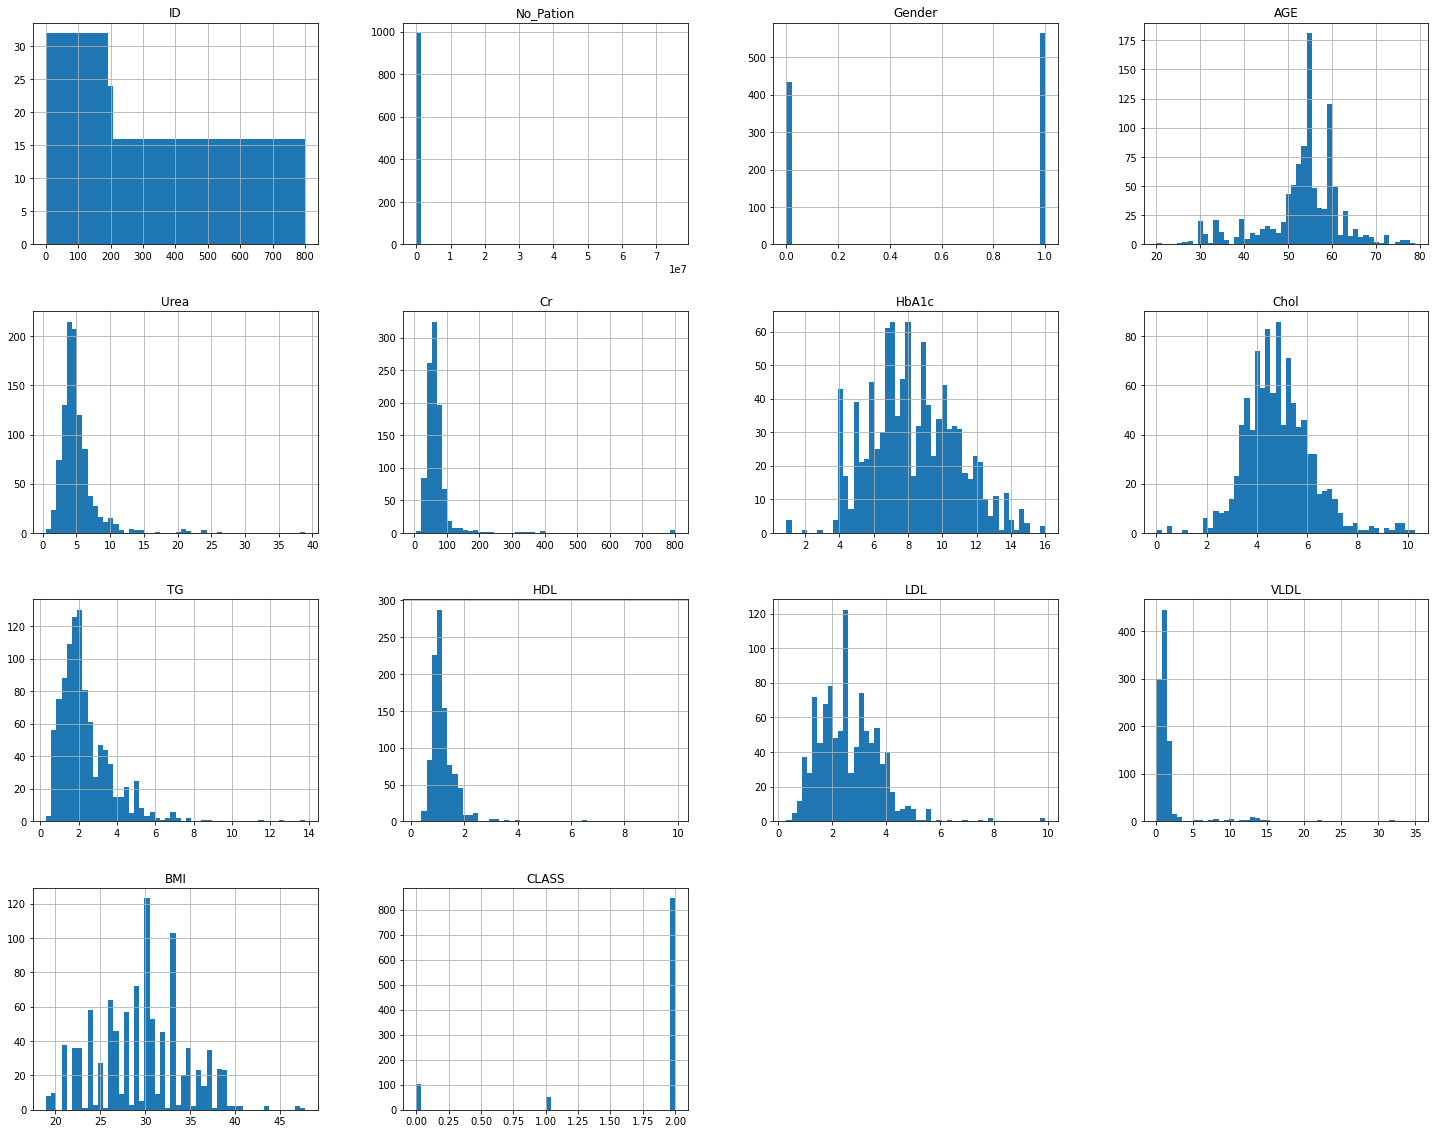

In [37]:
df.hist(bins=50, figsize=(25, 20))
plt.show()

In [38]:
pip install shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
import shap

In [49]:
from xgboost import XGBClassifier


In [50]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .80)

In [51]:
model.fit(X_train, y_train)


XGBClassifier(eval_metric='mlogloss', objective='multi:softprob',
              use_label_encoder=False)

In [52]:
y_pred = model.predict(X_test)


In [53]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.99


In [104]:
recall = recall_score(y_test, y_pred,average='micro')
print(recall)

0.955


[[ 15   0   1]
 [  0   7   1]
 [  0   0 176]]


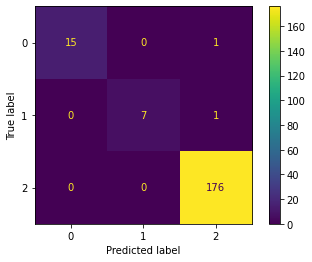

In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_pred)
print(cm)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [102]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.47      1.00      0.64         8
           2       1.00      0.95      0.97       176

    accuracy                           0.95       200
   macro avg       0.82      0.98      0.87       200
weighted avg       0.98      0.95      0.96       200



xgboost algorithm used


In [65]:
pip install shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
import xgboost
import shap

In [67]:
modell = xgboost.XGBRegressor().fit(X_test, y_test)


[18:27:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [74]:
explainer = shap.Explainer(modell)

In [75]:
shap_values = explainer(X)


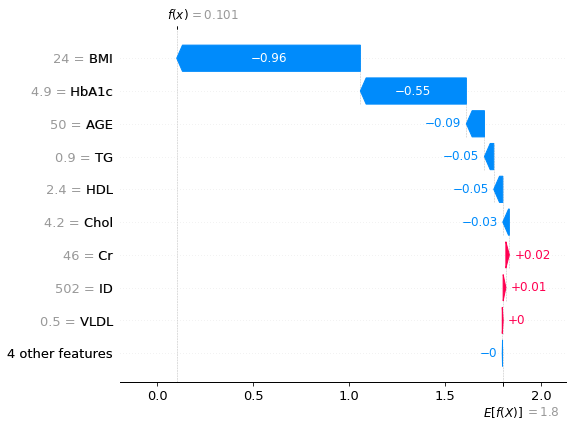

In [76]:
shap.plots.waterfall(shap_values[0])


In [79]:
shap.initjs()


In [80]:
# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[0])

In [81]:
shap.plots.force(shap_values)


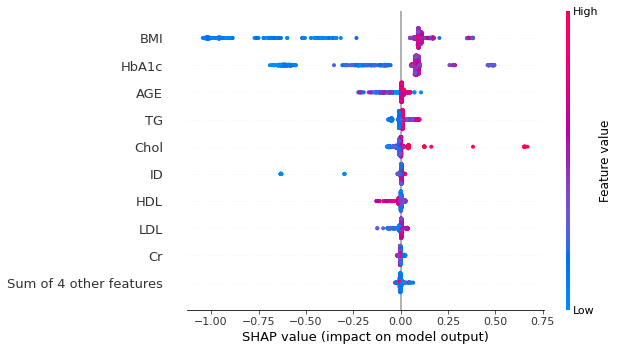

In [83]:
shap.plots.beeswarm(shap_values)


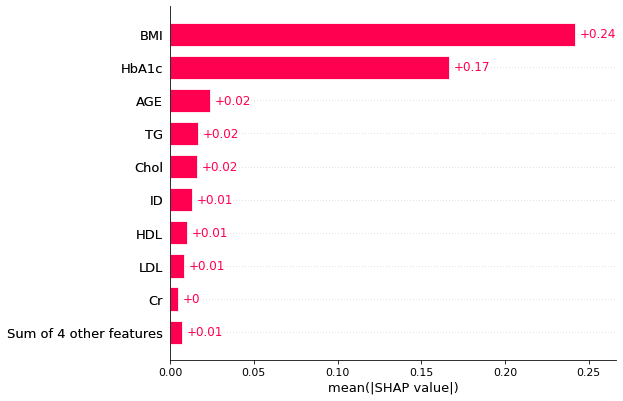

In [84]:
shap.plots.bar(shap_values)


test data accuracy

ADAboost algorithm used

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .80)

In [89]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)

In [90]:
model = abc.fit(X_train, y_train)

In [91]:
model.score(X_train, y_train)

0.95875

In [92]:
model.score(X_test, y_test)

0.955

In [93]:
y_pred = model.predict(X_test)



In [94]:
print(accuracy_score(y_test, y_pred))

0.955


In [95]:
recall=metrics.recall_score(y_test, y_pred, average='micro')
pre=metrics.precision_score(y_test, y_pred, average='macro')
f1=metrics.f1_score(y_test, y_pred, average='weighted')


In [96]:
print('recall=',recall)
print('precision=',pre)
print('f1=',f1)


recall= 0.955
precision= 0.823529411764706
f1= 0.9625096209912536


In [97]:
metrics.recall_score(y_test, y_pred, labels=[1, 2], average='micro')


0.9510869565217391

In [98]:
metrics.precision_score(y_test, y_pred, labels=[1, 2], average='macro')


0.7352941176470589

In [99]:
metrics.f1_score(y_test, y_pred, labels=[1, 2], average='weighted')

0.9592495880339713

[[ 16   0   0]
 [  0   8   0]
 [  0   9 167]]


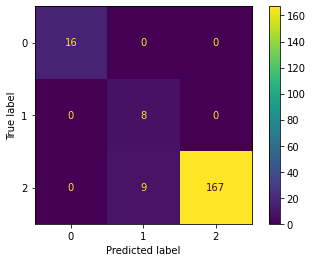

In [100]:
cm=confusion_matrix(y_test, y_pred)
print(cm)
cm_display = ConfusionMatrixDisplay(cm).plot()


In [101]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.47      1.00      0.64         8
           2       1.00      0.95      0.97       176

    accuracy                           0.95       200
   macro avg       0.82      0.98      0.87       200
weighted avg       0.98      0.95      0.96       200



ERROR  FIND OUT

In [105]:
from sklearn import metrics 


#import result of mse
print("mse=",metrics.mean_squared_error(y_test, y_pred))

#import result of mae
print("mae=",metrics.mean_absolute_error(y_test, y_pred))

#import result of rmse
print("rmse=",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

mse= 0.045
mae= 0.045
rmse= 0.21213203435596426


F1,RECALL,PRECESION,ACCURACY SCORE

In [ ]:
from sklearn import metrics 
